# Fandango Movie Ratings Analysis

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). 

The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

# GOAL

Here we will try to find out is Fandango a biased review or not?

In [27]:
import numpy as np
import pandas as pd
fandango_2015=pd.read_csv('fandango_score_comparison.csv')
fandango_2016_17=pd.read_csv('movie_ratings_16_17.csv')

Below we isolate only the columns that provide information about Fandango so we make the relevant data more readily available for later use.

In [3]:
fandango_previous=fandango_2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after=fandango_2016_17[['movie', 'year', 'fandango']].copy()

In [4]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


If we explore the two data sets, we will notice that there are movies with a releasing year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

Let's start with Hickey's data set and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the FILM column.

In [7]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [8]:
fandango_previous['year']=fandango_previous['FILM'].str[-5:-1]

In [9]:
fandango_previous['year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object

In [11]:
fandango_previous['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

Since we are having data other than 2015. So we will remove those data which is not in 2015.

In [17]:
fandango_15=fandango_previous[fandango_previous['year']=='2015'].copy()

In [18]:
fandango_15['year'].value_counts()

2015    129
Name: year, dtype: int64

In [19]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

We will remove 2017 Data set from here.

In [20]:
fandango_16=fandango_after[fandango_after['year']==2016].copy()

In [21]:
fandango_16['year'].value_counts()

2016    191
Name: year, dtype: int64

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

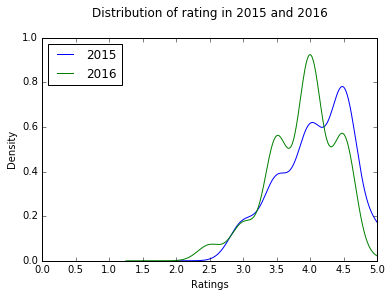

In [33]:
fandango_15['Fandango_Stars'].plot.kde(label='2015',legend=True)
fandango_16['fandango'].plot.kde(label='2016',legend=True)
plt.title('Distribution of rating in 2015 and 2016',y=1.07)
plt.xlabel('Ratings')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,0.5))
plt.show()

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?

We will look at the relative frequencies here.


In [38]:
fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [39]:
fandango_16['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

# Determining the Direction of the Change


In [44]:
mean_15=fandango_15['Fandango_Stars'].mean()
mean_16=fandango_16['fandango'].mean()

median_15=fandango_15['Fandango_Stars'].median()
median_16=fandango_16['fandango'].median()

mode_15=fandango_15['Fandango_Stars'].mode()[0]
mode_16=fandango_16['fandango'].mode()[0]

In [43]:
mode_15

4.5

In [45]:
df=pd.DataFrame()

In [46]:
df['2015']=[mean_15,median_15,mode_15]
df['2016']=[mean_16,median_16,mode_16]
df.index=['mean','median','mode']
df

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


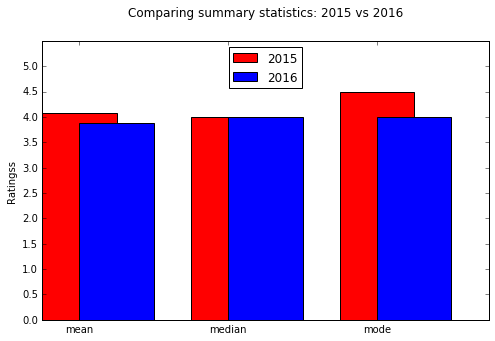

In [50]:
df['2015'].plot.bar(color = 'red', align = 'center', label = '2015')
df['2016'].plot.bar(color = 'blue', align = 'edge', label = '2016', rot=0,figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Ratingss')
plt.legend(loc = 'upper center')
plt.show()


# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.